<a href="https://colab.research.google.com/github/tricktx/Ciencia-de-Dados/blob/main/3%C2%B0_Projeto_A%C3%A7%C3%B5es_Magalu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando bibliotecas

import pandas as pd #Fornece estruturas de dados de alto nível e uma grande variedade de ferramentas para análise.
import numpy as np #Processamento de grandes matrizes e matrizes multidimensionais

##Visualização Gráfica
import matplotlib.pyplot as plt #Criação de diagramas e gráficos bidimensionais
import seaborn as sns #Há uma rica galeria de visualizações, incluindo alguns tipos complexos, como séries temporais e etc.
import plotly.express as px #Permite construir facilmente gráficos sofisticados, como gráficos 3D, gráficos ternários e etc.
import plotly.graph_objects as go

In [ ]:
df = pd.read_excel('/content/Vase_004 - Magalu - Sem Resolução.xlsx')
#Usei pandas para trazer a base de dados para o Colab
df.head() #head = cabeça, logo, conseguimos trazer os 5 primeiros dados da nossa base de dados.

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


In [ ]:
df.isnull().sum()

Data          0
Maior         0
Menor         0
Abertura      0
Fechamento    0
Volume        0
Adj Close     0
dtype: int64

In [ ]:
df.tail() #Tail = Rabo, logo, conseguimos trazer os 5 últimos dados da nossa base de dados. 

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
242,2021-12-23,6.34,5.99,6.22,6.20,97106100,6.20
243,2021-12-27,6.78,6.23,6.23,6.78,124279800,6.78
244,2021-12-28,6.96,6.64,6.79,6.83,165573900,6.83
245,2021-12-29,6.90,6.70,6.84,6.76,79247400,6.76
246,2021-12-30,7.41,6.77,6.80,7.22,180329400,7.22


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [ ]:
df.describe()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
count,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000
mean,18.977530,18.205668,18.629717,18.549555,4.536056e+07,18.541389
std,5.632712,5.567061,5.602659,5.637050,4.082594e+07,5.631316
min,6.200000,5.620000,5.710000,5.740000,8.716100e+06,5.740000
25%,15.010000,14.275000,14.705000,14.555000,2.285200e+07,14.555000
50%,20.650000,19.930000,20.280001,20.270000,3.130900e+07,20.255312
75%,22.595000,21.985001,22.375000,22.200001,4.742785e+07,22.183912
max,27.070000,25.900000,26.250000,26.240000,2.578313e+08,26.220984


In [ ]:
df.shape #Com o Shape, consegurei ver a quantidade de linhas por colunas

(247, 7)

In [ ]:
#Séries Temporais = Transformando a coluna de datas em índices

Dados = df.set_index('Data');
Dados.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


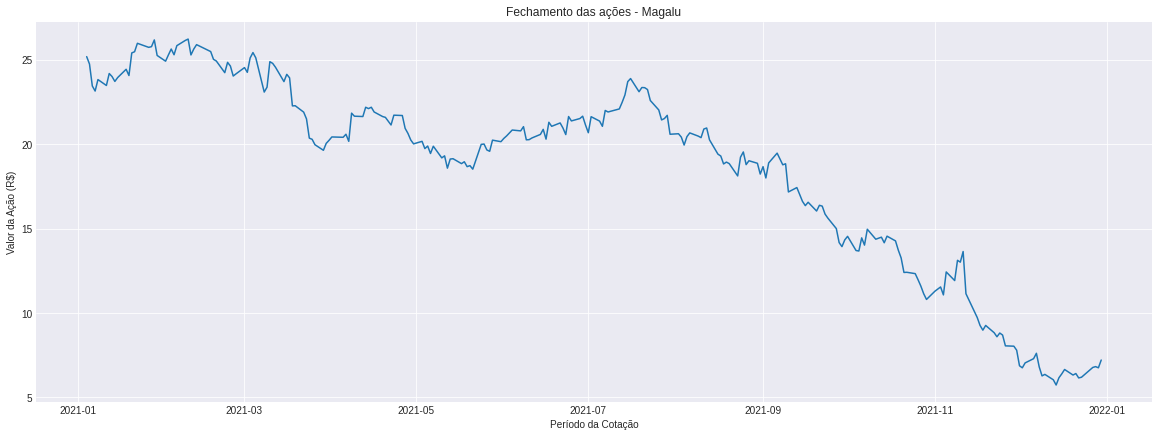

In [ ]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,7))
plt.title('Fechamento das ações - Magalu')
plt.plot( Dados.index, df['Fechamento'] )

plt.xlabel('Período da Cotação')
plt.ylabel('Valor da Ação (R$)');

In [ ]:
# Ele fornece cálculos de janela contínua sobre os dados subjacentes no objeto Series fornecido. = Rolling

média_móvel = Dados['Fechamento'].rolling(5).mean() 
print(média_móvel)

Data
2021-01-04       NaN
2021-01-05       NaN
2021-01-06       NaN
2021-01-07       NaN
2021-01-08    24.084
               ...  
2021-12-23     6.354
2021-12-27     6.378
2021-12-28     6.478
2021-12-29     6.546
2021-12-30     6.758
Name: Fechamento, Length: 247, dtype: float64


In [ ]:
média_mensal = Dados['Fechamento'].rolling(30).mean()
print(média_mensal)

Data
2021-01-04         NaN
2021-01-05         NaN
2021-01-06         NaN
2021-01-07         NaN
2021-01-08         NaN
                ...   
2021-12-23    7.737667
2021-12-27    7.508667
2021-12-28    7.364667
2021-12-29    7.265333
2021-12-30    7.197000
Name: Fechamento, Length: 247, dtype: float64


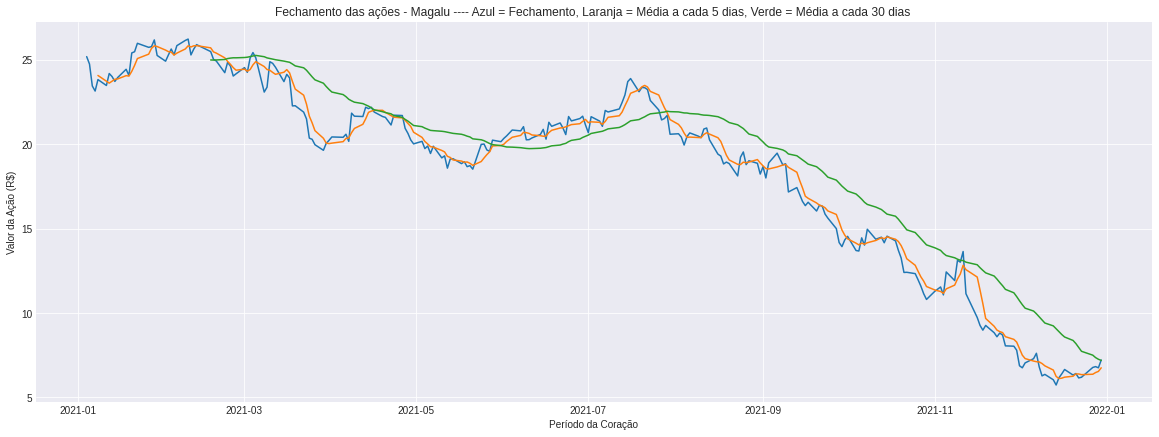

In [ ]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,7))
plt.title('Fechamento das ações - Magalu ---- Azul = Fechamento, Laranja = Média a cada 5 dias, Verde = Média a cada 30 dias ')


plt.plot( Dados.index, df['Fechamento'] )
plt.plot( Dados.index, média_móvel )
plt.plot(Dados.index, média_mensal)

plt.xlabel('Período da Coração')
plt.ylabel('Valor da Ação (R$)');

In [ ]:
# dt.month = Criar uma coluna com o mês, mas só consigo fazer quando a data está em datetime
df['Mes'] = df['Data'].dt.month
df.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close,Mes
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740,1
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058,1
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999,1
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217,1
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723,1


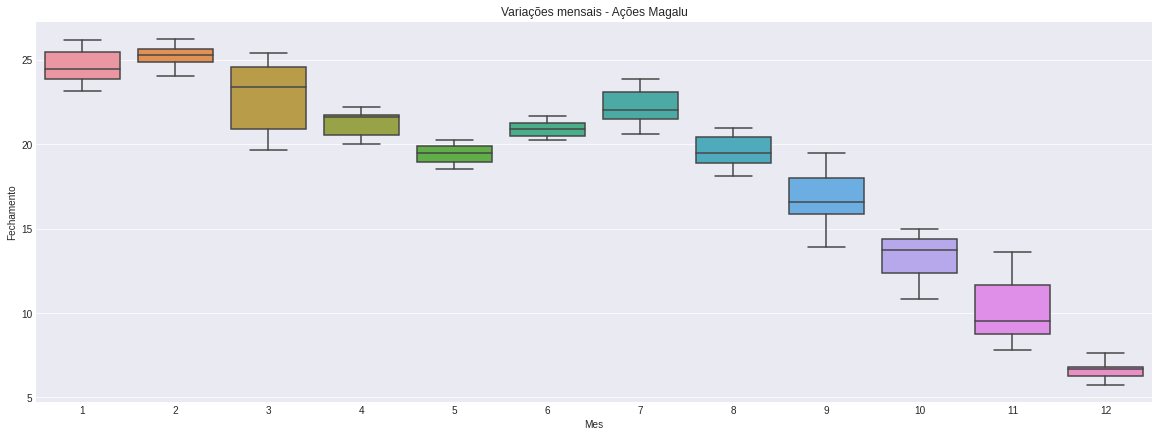

In [ ]:
#Variações mensais 

plt.figure(figsize=(20,7))
plt.title('Variações mensais - Ações Magalu')
sns.boxplot(
    data=df,
    x='Mes',
    y='Fechamento'
)

In [ ]:
df.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close,Mes
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740,1
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058,1
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999,1
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217,1
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723,1


In [ ]:
#Gráfico muito bom para analisar o mercado.

Grafico = go.Figure(
    data=[
          go.Candlestick(
              x = Dados.index,
              open = Dados['Abertura'],
              high = Dados['Maior'],
              low = Dados['Menor'],
              close = Dados['Fechamento'],
          )
    ]
)

Grafico.update_layout( xaxis_rangeslider_visible=False )

Grafico.show()